In [5]:
from urllib import request, error
#import a module with classes and functions which help opening URL's
from bs4 import BeautifulSoup as bs
#A library that makes webscraping easier

site1 = "https://worldpopulationreview.com/country-rankings/crime-rate-by-country"

response = BeautifulSoup(request.urlopen(site1),"html.parser")
TAB = response.find("table", class_="wpr-table min-w-full border-collapse")

rows = TAB.find_all("tr")

with open("Crime.csv", "w") as file:
    file.write("..,Country,Crime index,Safety index")
    for row in rows:
        cells = row.find_all("td")
        row_contents = []
        for cell in cells:
            row_contents.append(cell.text.strip())
        file.write(",".join(row_contents) + "\n")

In [126]:
import pandas as pd

Crimedf = pd.read_csv("Crime.csv")
Crimedf.drop(columns=["..", "Safety index"], axis=1, inplace=True)
pd.to_numeric(Crimedf["Crime index"], errors="coerce")
Crimedf


,Country,Crime index
0,Venezuela,81.2
1,Papua New Guinea,79.7
2,Afghanistan,78.3
3,Haiti,77.9
4,South Africa,75.4
...,...,...
136,Oman,19.0
137,Taiwan,16.7
138,Qatar,16.0
139,United Arab Emirates,15.6


In [129]:
site2 = "https://worldpopulationreview.com/country-rankings/gini-coefficient-by-country"

response = BeautifulSoup(request.urlopen(site2),"html.parser")
TAB = response.find("table", class_="wpr-table min-w-full border-collapse")

rows = TAB.find_all("tr")

with open("Gini.csv", "w") as file:
    file.write("..,Country,Gini Coefficient,1,2,3")
    for row in rows:
        cells = row.find_all("td")
        row_contents = []
        for cell in cells:
            row_contents.append(cell.text.strip())
        file.write(",".join(row_contents) + "\n")

In [182]:
Ginidf = pd.read_csv("Gini.csv")
Ginidf.drop(columns=["..", "1", "2", "3"], axis=1, inplace=True)
Ginidf["Gini Coefficient"]=Ginidf["Gini Coefficient"].str.replace("%", '')
Ginidf["Gini Coefficient"]= pd.to_numeric(Ginidf["Gini Coefficient"], errors="coerce")
Ginidf


,Country,Gini Coefficient
0,South Africa,63.0
1,Namibia,59.1
2,Colombia,54.8
3,Eswatini,54.6
4,Botswana,53.3
...,...,...
229,Montserrat,NaN
230,Falkland Islands,NaN
231,Tokelau,NaN
232,Niue,NaN


In [184]:
site3 = "https://worldpopulationreview.com/country-rankings/hdi-by-country"

response = BeautifulSoup(request.urlopen(site3),"html.parser")
TAB = response.find("table", class_="wpr-table min-w-full border-collapse")

rows = TAB.find_all("tr")

with open("HDI.csv", "w") as file:
    file.write("..,Country,HDI tier,HDI")
    for row in rows:
        cells = row.find_all("td")
        row_contents = []
        for cell in cells:
            row_contents.append(cell.text.strip())
        file.write(",".join(row_contents) + "\n")

In [185]:
HDIdf = pd.read_csv("HDI.csv")
HDIdf.drop(columns=["..", "HDI tier"], axis=1, inplace=True)
HDIdf

,Country,HDI
0,United States,0.927
1,Russia,0.821
2,Japan,0.920
3,Turkey,0.855
4,Germany,0.950
...,...,...
188,Saint Vincent and the Grenadines,0.772
189,Dominica,0.740
190,Marshall Islands,0.731
191,Palau,0.797


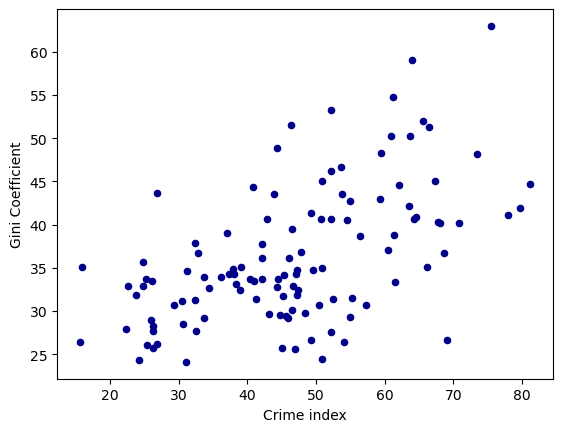

In [186]:
crimevsgini = pd.merge(Crimedf, Ginidf, on="Country",how="inner")
crimevsgini
scatter1 = crimevsgini.plot.scatter(x="Crime index", y="Gini Coefficient", c='DarkBlue')

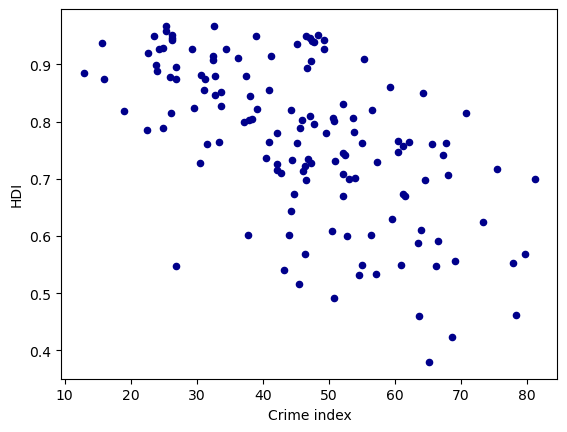

In [172]:
crimevsgini = pd.merge(Crimedf, HDIdf, on="Country")
crimevsgini
scatter2 = crimevsgini.plot.scatter(x="Crime index", y="HDI", c='DarkBlue')

In [37]:
import urllib.request
import shutil
import os
urllib.request.urlretrieve("https://api.worldbank.org/v2/en/indicator/SI.POV.GINI?downloadformat=csv", "GiniUS.zip")
shutil.unpack_archive("GiniUS.zip")
os.rename("API_SI.POV.GINI_DS2_en_csv_v2_19376.csv", "GiniUS.csv")



In [65]:
GiniUSdf = pd.read_csv("GiniUS.csv", header=4)
GiniUSdf = GiniUSdf.drop(columns=["Country Code", "Indicator Name", "Indicator Code"])
GiniUSdf = pd.melt(GiniUSdf, id_vars=["Country Name"], var_name="Year", value_name="Gini")
GiniUSdf = GiniUSdf[GiniUSdf["Country Name"] == "United States"]
#GiniUSdf = GiniUSdf.set_index("Country Name").transpose()
#GiniUSdf.index.name = "Year"
#GiniUSdf.reset_index(inplace=True)
GiniUSdf

,Country Name,Year,Gini
251,United States,1960,NaN
517,United States,1961,NaN
783,United States,1962,NaN
1049,United States,1963,37.6
1315,United States,1964,38.1
...,...,...,...
16211,United States,2020,39.7
16477,United States,2021,39.7
16743,United States,2022,41.3
17009,United States,2023,NaN
